<a href="https://colab.research.google.com/github/effat38718/CVPR_assignment/blob/master/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import the dependecies

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from IPython import display
from scipy.signal import savgol_filter
from google.colab import drive

In [147]:

df = pd.read_csv('/content/sample_data/data.csv')
df.head()

,x1,x2,y
0,100,47,0
1,59,71,1
2,49,44,0
3,21,68,1
4,78,67,0


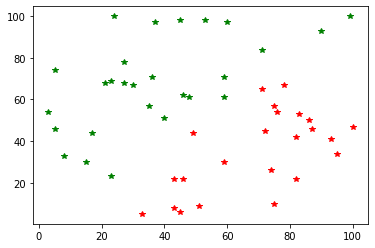

In [148]:

x1 = df["x1"].values.tolist()
x2 = df["x2"].values.tolist()
y = df["y"].values.tolist()

for i in range(len(y)):
    if y[i] == 0:
        plt.plot(x1[i], x2[i], "r*")
    else:
        plt.plot(x1[i], x2[i], "g*")

In [149]:
W = [random.random(), random.random()]
b = random.random()

lr = 0.1
theta=0.5

epoch = 0
count = 0


loss = []

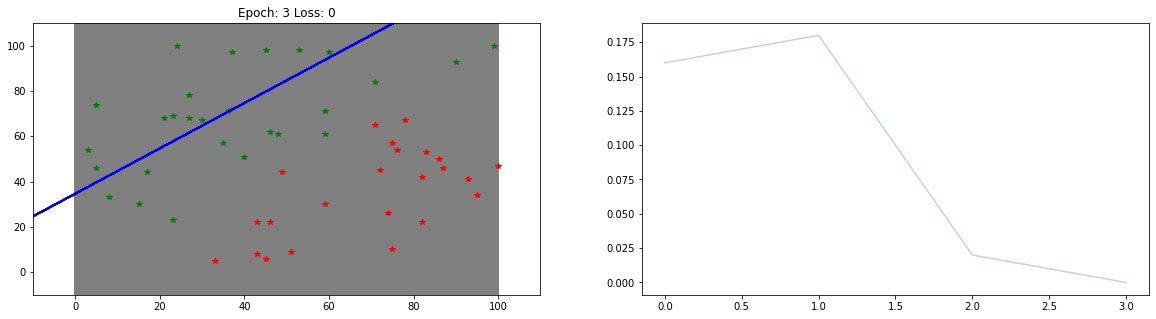

Epoch: 3 Loss: 0.0


In [150]:
while count < len(x1):

    total_error = 0
    for i in range(len(x1)):
        weighted_sum = W[0]*x1[i] + W[1]*x2[i] + b
        pred = 0
        if weighted_sum > theta:
          pred = 1

        error = y[i] - pred
        if error != 0:
            count = 0
            total_error += math.sqrt(error**2)
                
            W[0] += lr * error * x1[i]
            W[1] += lr * error * x2[i]
            b    += lr * error
        else:
            count += 1

    loss.append(1/len(x1)*total_error)

    plt.figure(figsize=(20,5))
    #loss.append([epoch, total_error])
    display.clear_output(wait= True)
    plt.subplot(1,2,1)

    for i in range(len(y)):
        if y[i] == 0:
            plt.plot(x1[i], x2[i], "r*")
        else:
            plt.plot(x1[i], x2[i], "g*")

        plt.xlim([-10, 110])
        plt.ylim([-10, 110])

        xintr = (theta-b)/W[0]
        yintr = (theta-b/W[1])

        slope = -yintr/xintr
        xx = plt.xlim()
          #  print(xx)

        yeq = []
        for x in xx:
            yeq.append(slope+x+yintr)
        plt.plot(xx,yeq, "b-")
        x_axis = np.arange(0,100,0.1)
        plt.fill_between(x_axis,xx[0],yeq[1],color="grey")

    plt.title(f"Epoch: {epoch} Loss: {total_error}")

    plt.subplot(1,2,2)
    plt.plot(loss, alpha=0.3)
    if epoch > 20:
        yhat = savgol_filter(loss, 21, 3)
        plt.plot(yhat, 'r--', lw=3)

    plt.show()

    print(f"Epoch: {epoch} Loss: {loss[-1]}")
    epoch +=1